# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 8.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
122031,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0
159146,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0757,0.0879,0.0024,0.0244,10,10,7,7
132763,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0,0,0,0
25479,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.1318,0.0024,0.1489,1,0,4,0
271105,0.0024,0.1221,0.0732,0.0024,0.0024,0.0146,0.2490,0.5005,0.0415,0.1636,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449730 entries, 0 to 449729
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          449730 non-null  float64
 1   Emg2          449730 non-null  float64
 2   Emg3          449730 non-null  float64
 3   Emg4          449730 non-null  float64
 4   Emg5          449730 non-null  float64
 5   Emg6          449730 non-null  float64
 6   Emg7          449730 non-null  float64
 7   Emg8          449730 non-null  float64
 8   Emg9          449730 non-null  float64
 9   Emg10         449730 non-null  float64
 10  repetition    449730 non-null  int64  
 11  rerepetition  449730 non-null  int64  
 12  stimulus      449730 non-null  int64  
 13  restimulus    449730 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.0 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000
mean,0.009672,0.077479,0.072574,0.050732,0.022604,0.050304,0.215483,0.240273,0.077911,0.196562,3.278532,2.272719,5.811698,4.161110
std,0.014184,0.193192,0.232346,0.150322,0.063215,0.096565,0.406609,0.383662,0.201897,0.360472,3.492835,3.274170,6.608935,6.308636
min,0.000000,0.000000,0.002400,0.002400,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.031700,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.002400,0.004900,0.080600,0.100100,0.002400,0.046400,2.000000,0.000000,3.000000,0.000000
75%,0.012200,0.058600,0.029300,0.022000,0.007300,0.061000,0.273400,0.300300,0.053700,0.249000,6.000000,4.000000,11.000000,8.000000
max,0.820300,3.728000,4.663100,3.754900,1.384300,1.635700,4.665500,4.668000,3.415500,4.663100,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     181641
12     15520
2      15500
4      15500
8      15495
7      15494
9      15474
11     15470
6      15458
5      15452
3      15436
10     15417
1      15408
14     10345
13     10336
17     10328
15     10292
16     10267
19      5175
21      5162
18      5160
23      5138
20      5132
22      5130
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.314571,-0.427617,-0.336982,-0.359104,-0.356387,-0.529994,-0.558357,-0.661987,-0.417034,-0.584954
1,-0.489546,-0.427617,-0.336982,-0.359104,-0.356387,-0.529994,-0.558357,-0.661987,-0.417034,-0.584954
2,-0.489546,-0.427617,-0.336982,-0.359104,-0.320341,-0.529994,-0.558357,-0.661987,-0.417034,-0.584954
3,-0.489546,-0.427617,-0.336982,-0.359104,-0.356387,-0.529994,-0.552692,-0.661987,-0.417034,-0.584954
4,0.028382,-0.427617,-0.336982,-0.359104,-0.356387,-0.529994,-0.558357,-0.661987,-0.417034,-0.584954
...,...,...,...,...,...,...,...,...,...,...
364659,1.393192,-0.427617,-0.336982,-0.359104,-0.356387,-0.529994,-0.558357,-0.450205,-0.417034,-0.584954
364660,1.561169,-0.415775,-0.336982,-0.359104,-0.356387,-0.529994,-0.547254,-0.420811,-0.417034,-0.584954
364661,1.225215,-0.381196,-0.336982,-0.359104,-0.356387,-0.529994,-0.525048,-0.344194,-0.417034,-0.584954
364662,1.050240,-0.392565,-0.336982,-0.359104,-0.356387,-0.529994,-0.525048,-0.314800,-0.417034,-0.584954


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
72/72 [==============================] - 7s 30ms/step - loss: 1.4224 - accuracy: 0.6454 - val_loss: 0.9905 - val_accuracy: 0.7383
Epoch 2/100
72/72 [==============================] - 2s 26ms/step - loss: 0.8976 - accuracy: 0.7618 - val_loss: 0.7904 - val_accuracy: 0.7852
Epoch 3/100
72/72 [==============================] - 2s 27ms/step - loss: 0.7601 - accuracy: 0.7923 - val_loss: 0.7129 - val_accuracy: 0.8049
Epoch 4/100
72/72 [==============================] - 2s 27ms/step - loss: 0.6987 - accuracy: 0.8072 - val_loss: 0.6614 - val_accuracy: 0.8172
Epoch 5/100
72/72 [==============================] - 2s 26ms/step - loss: 0.6520 - accuracy: 0.8191 - val_loss: 0.6253 - val_accuracy: 0.8253
Epoch 6/100
72/72 [==============================] - 2s 26ms/step - loss: 0.6150 - accuracy: 0.8271 - val_loss: 0.5935 - val_accuracy: 0.8338
Epoch 7/100
72/72 [==============================] - 2s 27ms/step - loss: 0.5866 - accuracy: 0.8346 - val_loss: 0.5617 - val_accuracy: 0.8398
Epoch 

72/72 [==============================] - 2s 26ms/step - loss: 0.2798 - accuracy: 0.9177 - val_loss: 0.3157 - val_accuracy: 0.9090
Epoch 59/100
72/72 [==============================] - 2s 26ms/step - loss: 0.2772 - accuracy: 0.9187 - val_loss: 0.3217 - val_accuracy: 0.9069
Epoch 60/100
72/72 [==============================] - 2s 26ms/step - loss: 0.2797 - accuracy: 0.9180 - val_loss: 0.3126 - val_accuracy: 0.9105
Epoch 61/100
72/72 [==============================] - 2s 26ms/step - loss: 0.2733 - accuracy: 0.9200 - val_loss: 0.3084 - val_accuracy: 0.9115
Epoch 62/100
72/72 [==============================] - 2s 26ms/step - loss: 0.2719 - accuracy: 0.9206 - val_loss: 0.3061 - val_accuracy: 0.9127
Epoch 63/100
72/72 [==============================] - 2s 26ms/step - loss: 0.2677 - accuracy: 0.9210 - val_loss: 0.3069 - val_accuracy: 0.9118
Epoch 64/100
72/72 [==============================] - 2s 26ms/step - loss: 0.2679 - accuracy: 0.9214 - val_loss: 0.3056 - val_accuracy: 0.9122
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

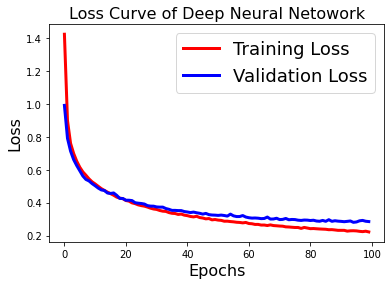

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

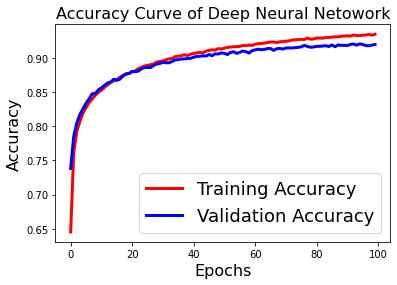

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([13,  0,  6, ..., 11,  3, 21], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

0

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 91.94466153867248


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     36119
           1       0.98      0.94      0.96      1954
           2       0.97      0.92      0.94      1922
           3       0.95      0.88      0.91      2033
           4       0.94      0.86      0.90      2058
           5       0.90      0.80      0.85      2110
           6       0.96      0.90      0.93      2091
           7       0.92      0.77      0.84      2167
           8       0.92      0.82      0.87      2207
           9       0.88      0.78      0.83      2223
          10       0.91      0.84      0.87      1851
          11       0.95      0.89      0.92      2086
          12       0.92      0.84      0.88      2125
          13       0.94      0.87      0.90      1388
          14       0.81      0.79      0.80      1386
          15       0.86      0.80      0.83      1459
          16       0.90      0.92      0.91      1382
 

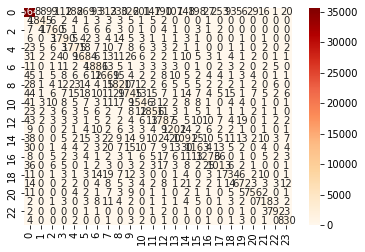

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6548064662087121
MSE: 7.489106440157404
RMSE: 2.7366231819812907


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9194689719716782
Recall Score :  0.9194466153867248
f1_score :  0.9179382365764774
